# About this notebook
1. This notebook prepares GeoJSON files to match Trivedi Centre for Political Data (TCPD) IDs. **To display Election Data and Capex in a Choropleth** 
2. Load raw GeoJSON, and Save JSON --> Excel
3. Add Unique identifiers in GeoJson properties for States, Districts, Parliamentary Constituency PC, Assembly.
4. Unique identifiers help match geography info with election data from TCPD
4. Reload new GeoJSON and visualize maps



In [17]:
# Project folder
proj_folder = "/Users/kalyan/Library/CloudStorage/OneDrive-Personal/Kalyan/KK-Python/Kalyan-Jupyter-Notebooks/Capex/"
shapefiles_raw = "/Users/kalyan/Library/CloudStorage/OneDrive-Personal/Kalyan/KK-Python/Kalyan-Jupyter-Notebooks/Capex/shape-files/1.raw"
shapefiles_interim = "/Users/kalyan/Library/CloudStorage/OneDrive-Personal/Kalyan/KK-Python/Kalyan-Jupyter-Notebooks/Capex/shape-files/2.interim"
shapefiles_cleaned = "/Users/kalyan/Library/CloudStorage/OneDrive-Personal/Kalyan/KK-Python/Kalyan-Jupyter-Notebooks/Capex/shape-files/3.cleaned"

#State Input files and folders 
st_old_geo_file = "shape-files/1.raw/india_state-V2.json"
st_geo_file ="shape-files/1.raw/INDIA_STATES.geojson"
# District files and folders 
dist_old_geo_file = "shape-files/1.raw/india_2011_district-V2.json"
dist_geo_file = "shape-files/1.raw/INDIA_DISTRICTS.geojson"
# Parliament Constituency files and folders 
pc_old_geo_file = "shape-files/1.raw/india_2014_parliament-V2.json"
pc_geo_file = "shape-files/1.raw/india_2014_parliament-V3.json"
# Assembly Constituency files and folders 
ac_geo_file = "shape-files/1.raw/india_2012-17_assembly-V2.json"

print('Folder and File Names set-up')


Folder and File Names set-up


## Load JSON and Save in Excel: Run Once

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

# File Name - GeoJSON file
st_file_path= os.path.join(proj_folder, st_geo_file)
dist_file_path= os.path.join(proj_folder, dist_geo_file)
pc_file_path= os.path.join(proj_folder, pc_geo_file)
ac_file_path= os.path.join(proj_folder, ac_geo_file)


# Read the GeoJSON file into a GeoDataFrame
st_gdf = gpd.read_file(st_file_path)
dist_gdf = gpd.read_file(dist_file_path)
pc_gdf = gpd.read_file(pc_file_path)
ac_gdf = gpd.read_file(ac_file_path)


# Save the unique values to an Excel file
st_gdf.to_excel(os.path.join(shapefiles_raw, 'st_geo.xlsx'), index=False)
dist_gdf.to_excel(os.path.join(shapefiles_raw, 'dist_geo.xlsx'), index=False)
pc_gdf.to_excel(os.path.join(shapefiles_raw, 'pc_geo.xlsx'), index=False)
ac_gdf.to_excel(os.path.join(shapefiles_raw, 'ac_geo.xlsx'), index=False)

print('FINITO: JSON ---> Excel')

FINITO: JSON ---> Excel


DO MANUAL EDIT TO CREATE Unique Identifiers

## Clean Districts GeoJSON

new GeoJSON saved


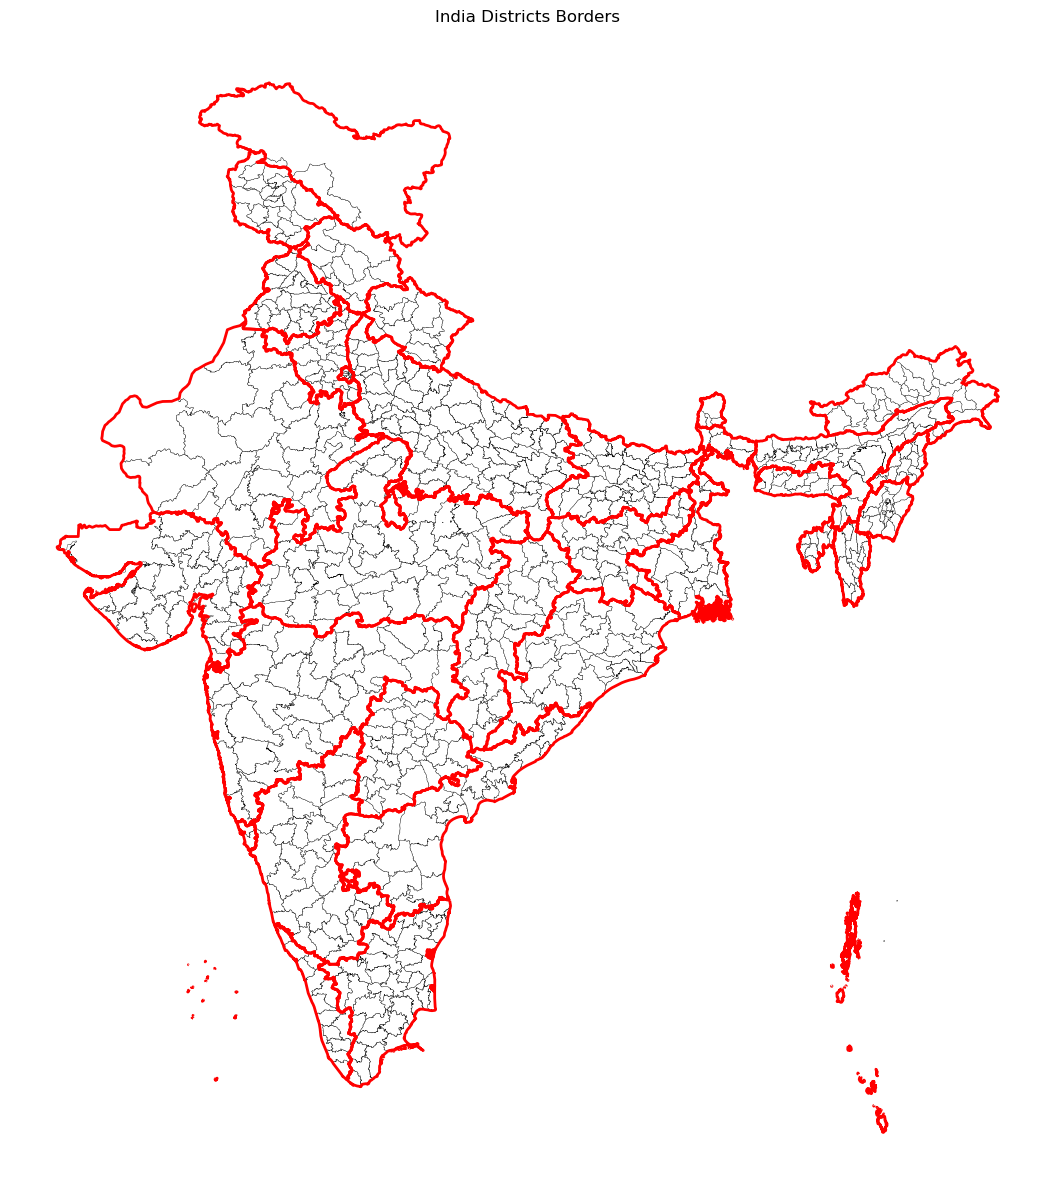

District UID Excel Saved
Finito


In [4]:
import geopandas as gpd

# Load the GeoJSON file into a GeoDataFrame
dist_file_path= os.path.join(proj_folder, dist_geo_file)
dist_gdf = gpd.read_file(dist_file_path)
states_gdf = gpd.read_file(st_file_path)


# # Define the list of conditions and their corresponding new values
conditions = [
{'match':'GUJARAT', 'new_value':'GJ-S07'},
{'match':'MADHYA PRADESH', 'new_value':'MP-S13'},
{'match':'UTTAR PRADESH', 'new_value':'UP-S26'},
{'match':'RAJASTHAN', 'new_value':'RJ-S21'},
{'match':'KERALA', 'new_value':'KL-S12'},
{'match':'UTTARAKHAND', 'new_value':'UK-S27'},
{'match':'ODISHA', 'new_value':'OD-S19'},
{'match':'KARNATAKA', 'new_value':'KA-S11'},
{'match':'CHHATTISGARH', 'new_value':'CG-S05'},
{'match':'HIMACHAL PRADESH', 'new_value':'HP-S09'},
{'match':'MANIPUR', 'new_value':'MN-S15'},
{'match':'JHARKHAND', 'new_value':'JH-S10'},
{'match':'DELHI', 'new_value':'DL-U04'},
{'match':'CHANDIGARH', 'new_value':'CH-U02'},
{'match':'DADRA,NAGAR HAVELI,DAMAN & DIU', 'new_value':'DN-U03A'},
{'match':'DADRA,NAGAR HAVELI,DAMAN & DIU', 'new_value':'DD-U03B'},
{'match':'TRIPURA', 'new_value':'TR-S25'},
{'match':'ASSAM', 'new_value':'AS-S03'},
{'match':'SIKKIM', 'new_value':'SK-S22'},
{'match':'MEGHALAYA', 'new_value':'ML-S16'},
{'match':'PUDUCHERRY', 'new_value':'PY-U08'},
{'match':'LAKSHADWEEP', 'new_value':'LD-U07'},
{'match':'ANDAMAN & NICOBAR', 'new_value':'AN-U01'},
{'match':'GOA', 'new_value':'GA-S06'},
{'match':'MIZORAM', 'new_value':'MZ-S17'},
{'match':'JAMMU & KASHMIR', 'new_value':'JK-U05'},
{'match':'LADAKH', 'new_value':'LK-U06'},
{'match':'TELANGANA', 'new_value':'TS-S24'},
{'match':'MAHARASHTRA', 'new_value':'MH-S14'},
{'match':'WEST BENGAL', 'new_value':'WB-S28'},
{'match':'HARYANA', 'new_value':'HR-S08'},
{'match':'PUNJAB', 'new_value':'PB-S20'},
{'match':'ARUNACHAL PRADESH', 'new_value':'AR-S02'},
{'match':'BIHAR', 'new_value':'BR-S04'},
{'match':'NAGALAND', 'new_value':'NL-S18'},
{'match':'TAMIL NADU', 'new_value':'TN-S23'},
{'match':'ANDHRA PRADESH', 'new_value':'AP-S01'},
]

# Add a new property 'new_property' with a default value
dist_gdf['ST_UNIQUE_ID'] = 'NA'

# Modify the new property based on the list of conditions
for idx, row in dist_gdf.iterrows():
    for condition in conditions:
        if row['stname'] == condition['match']:  # Replace 'existing_property' with the actual column name
            dist_gdf.at[idx, 'ST_UNIQUE_ID'] = condition['new_value']
            break  # Exit the loop after the first match to avoid overwriting

# Sort the DataFrame by 'st_id' and 'dtname'
dist_gdf = dist_gdf.sort_values(by=['ST_UNIQUE_ID', 'dtname']).reset_index(drop=True)

# Group by 'st_id' and create a serial number for each district within each group
dist_gdf['serial_no'] = dist_gdf.groupby('ST_UNIQUE_ID').cumcount() + 1

# Convert the serial number to a string and pad with zeros to have four digits
dist_gdf['serial_no'] = dist_gdf['serial_no'].astype(str).str.zfill(3)

# Create the unique ID string by concatenating 'st_id' and the zero-padded serial number
dist_gdf['DT_UNIQUE_ID'] = dist_gdf['ST_UNIQUE_ID'] + '-D' + dist_gdf['serial_no']

# Drop the 'serial_no' column as it is no longer needed
dist_gdf = dist_gdf.drop(columns=['serial_no'])


# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(shapefiles_cleaned, 'india_districts_cleaned-V1.geojson')
dist_gdf.to_file(output_file_path, driver='GeoJSON')

print('new GeoJSON saved')
##############
# Read the just saved new GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(output_file_path)

# Create a plot
fig, ax = plt.subplots(figsize=(15, 15))
# Set the background color of the figure
fig.patch.set_facecolor('white')  # Change 'lightblue' to your preferred color

# Plot the districts with a thin border
# districts_gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)
gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=0.25)

# Plot the state borders with a thicker line
states_gdf.boundary.plot(ax=ax, edgecolor='red', linewidth=2)

# # Loop through each geometry and add text annotations for "ST_UNIQUE_ID"
# for idx, row in gdf.iterrows():
#     # Get the geometry's representative point (centroid)
#     point = row.geometry.representative_point()
#     # Use the `ax.annotate` method to add text annotations
#     ax.annotate(text=row['DT_UNIQUE_ID'], xy=(point.x, point.y), horizontalalignment='center', fontsize=4)


# Remove the axis for a cleaner look
ax.axis('off')
# Set the title
plt.title('India Districts Borders')
# Display the plot
plt.show()

# create excel with geo unique ids for cross-check and verification

df = dist_gdf[['ST_UNIQUE_ID', 'stname', 'DT_UNIQUE_ID', 'dtname']].drop_duplicates()
df = df.sort_values(by=['DT_UNIQUE_ID']).reset_index(drop=True)

# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(shapefiles_interim, 'dist_geo_uid.xlsx')
df.to_excel(output_file_path, sheet_name="dist-geo-uid")

print('District UID Excel Saved')

print('Finito')


## Clean Parliamentary Constituency GeoJSON

new GeoJSON saved


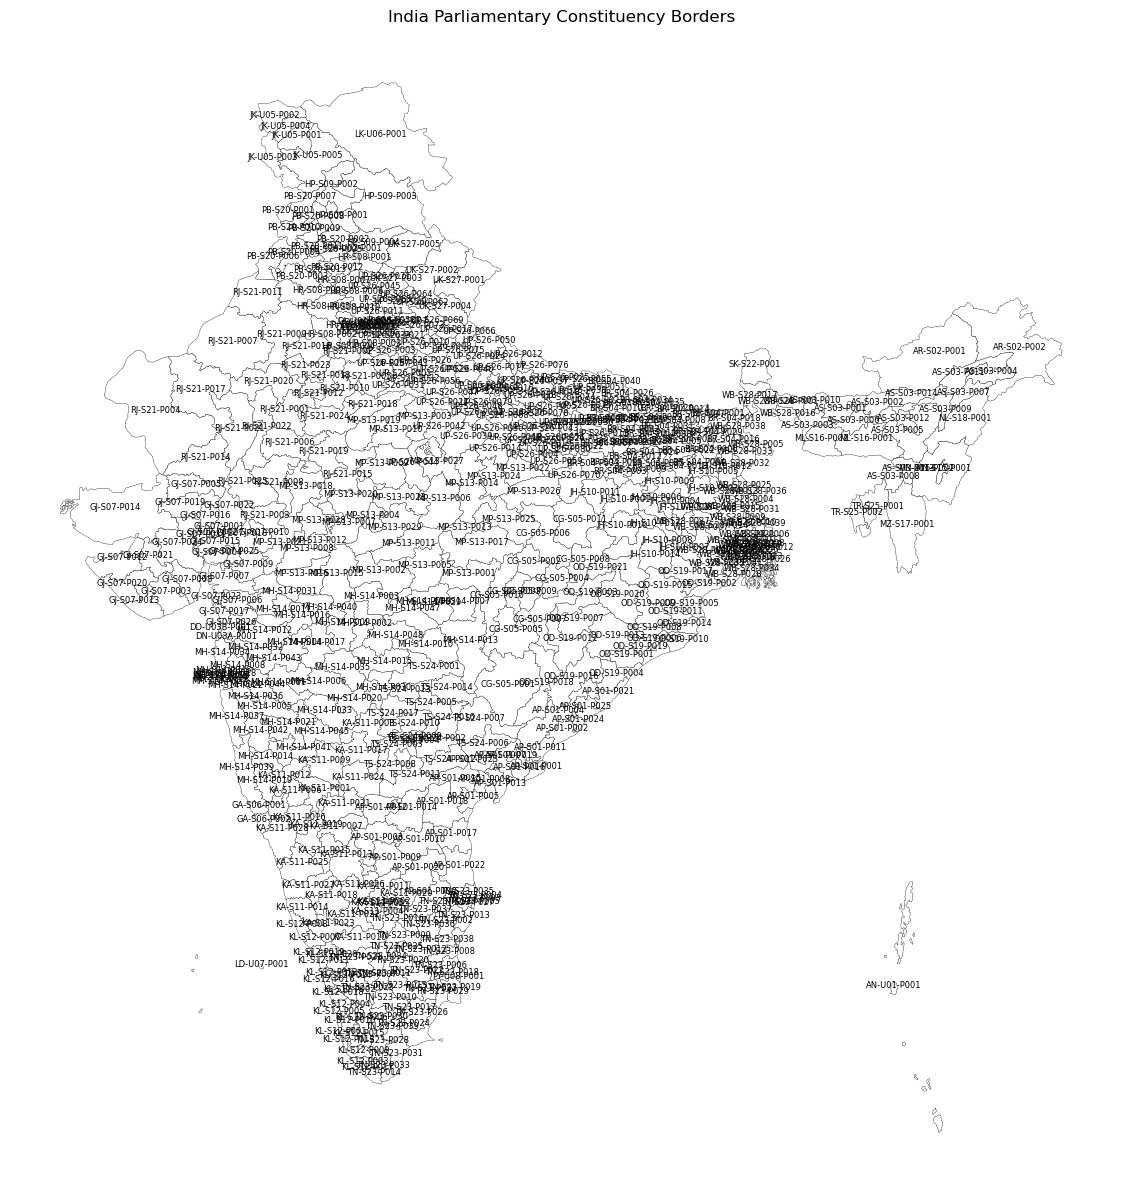

Parliament Constituency UID Excel Saved
Finito


In [19]:
import geopandas as gpd

# Load the GeoJSON file into a GeoDataFrame
pc_file_path= os.path.join(proj_folder, pc_geo_file)
pc_gdf = gpd.read_file(pc_file_path)
states_gdf = gpd.read_file(st_file_path)


# Add a new property 'new_property' with a default value
pc_gdf['ST_UNIQUE_ID'] = pc_gdf['ST_ABB'] + '-' + pc_gdf['ST_CODE']

# Sort the DataFrame by 'st_id' and 'dtname'
pc_gdf = pc_gdf.sort_values(by=['ST_UNIQUE_ID', 'PC_NAME']).reset_index(drop=True)

# Group by 'st_id' and create a serial number for each district within each group
pc_gdf['serial_no'] = pc_gdf.groupby('ST_UNIQUE_ID').cumcount() + 1

# Convert the serial number to a string and pad with zeros to have four digits
pc_gdf['serial_no'] = pc_gdf['serial_no'].astype(str).str.zfill(3)

# Create the unique ID string by concatenating 'st_id' and the zero-padded serial number
pc_gdf['PC_UNIQUE_ID'] = pc_gdf['ST_UNIQUE_ID'] + '-P' + pc_gdf['serial_no']

# Drop the 'serial_no' column as it is no longer needed
pc_gdf = pc_gdf.drop(columns=['serial_no'])


# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(shapefiles_cleaned, 'india_pc_cleaned-V1.geojson')
pc_gdf.to_file(output_file_path, driver='GeoJSON')

print('new GeoJSON saved')
##############
# Read the just saved new GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(output_file_path)

# Create a plot
fig, ax = plt.subplots(figsize=(15, 15))
# Set the background color of the figure
fig.patch.set_facecolor('white')  # Change 'lightblue' to your preferred color

# Plot the districts with a thin border
# districts_gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)
gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=0.25)

# Plot the state borders with a thicker line
# states_gdf.boundary.plot(ax=ax, edgecolor='blue', linewidth=1)

# Loop through each geometry and add text annotations for "ST_UNIQUE_ID"
for idx, row in gdf.iterrows():
    # Get the geometry's representative point (centroid)
    point = row.geometry.representative_point()
    # Use the `ax.annotate` method to add text annotations
    ax.annotate(text=row['PC_UNIQUE_ID'], xy=(point.x, point.y), horizontalalignment='center', fontsize=6)


# Remove the axis for a cleaner look
ax.axis('off')
# Set the title
plt.title('India Parliamentary Constituency Borders')
# Display the plot
plt.show()

# Export excel with geo unique ids for cross-check and verification

df = pc_gdf[['ST_UNIQUE_ID', 'ST_NAME', 'PC_UNIQUE_ID', 'PC_NAME',]].drop_duplicates()
df = df.sort_values(by=['PC_UNIQUE_ID']).reset_index(drop=True)

# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(shapefiles_interim, 'pc_geo_uid.xlsx')
df.to_excel(output_file_path, sheet_name="pc-geo-uid")

print('Parliament Constituency UID Excel Saved')

print('Finito')


## Clean Assembly Constituency GeoJSON

new GeoJSON saved


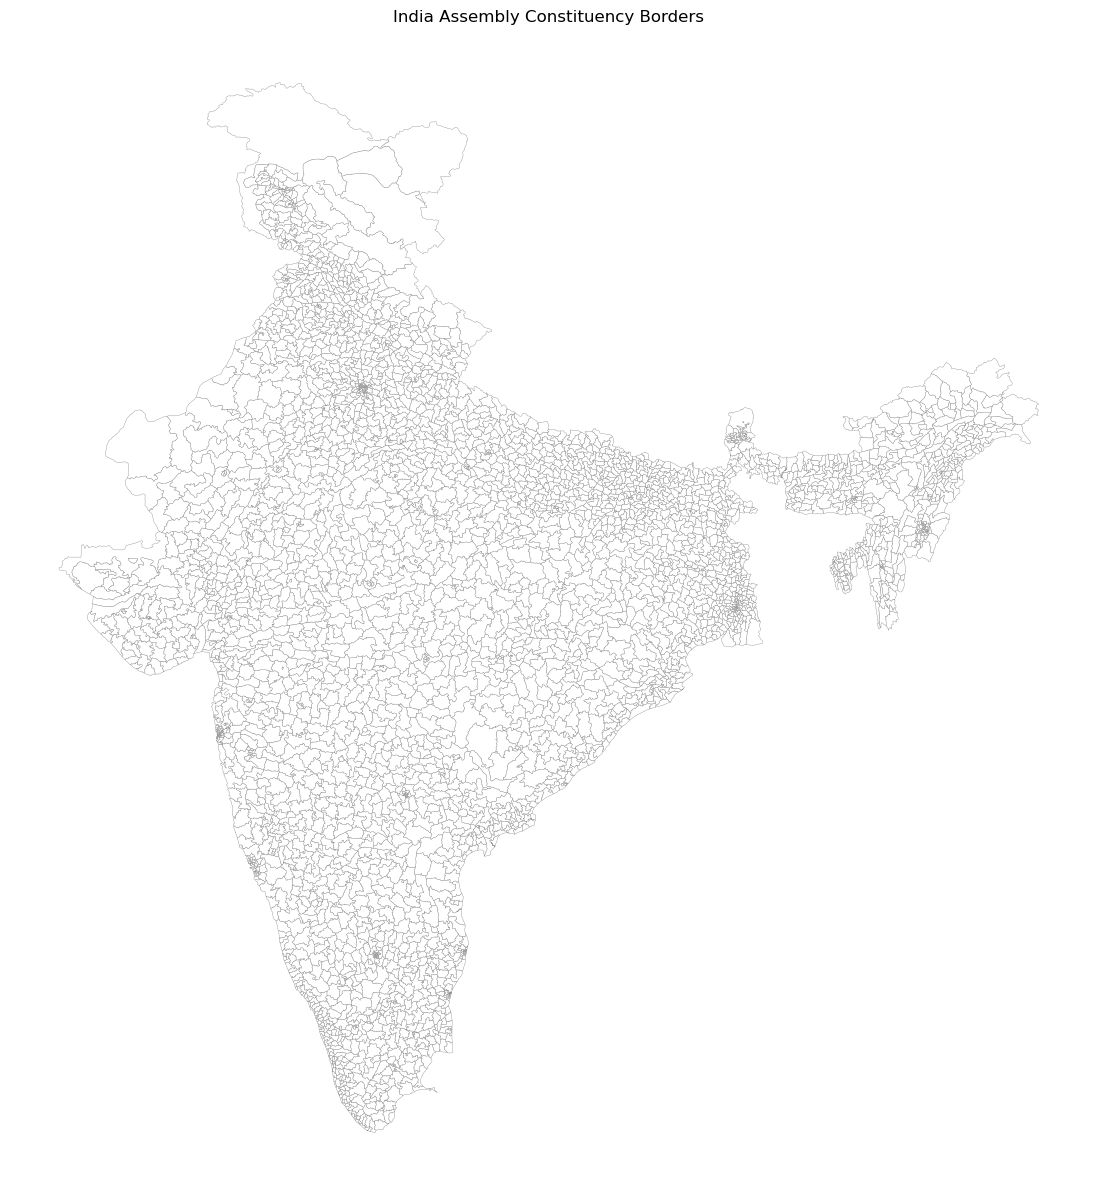

Finito


In [10]:
import geopandas as gpd

# Load the GeoJSON file into a GeoDataFrame
ac_file_path= os.path.join(proj_folder, ac_geo_file)
ac_gdf = gpd.read_file(ac_file_path)
states_gdf = gpd.read_file(st_file_path)

# # Define the list of conditions and their corresponding new values
conditions = [
{'match':'GUJARAT', 'new_value':'GJ-S07'},
{'match':'MADHYA PRADESH', 'new_value':'MP-S13'},
{'match':'UTTAR PRADESH', 'new_value':'UP-S26'},
{'match':'RAJASTHAN', 'new_value':'RJ-S21'},
{'match':'KERALA', 'new_value':'KL-S12'},
{'match':'UTTARAKHAND', 'new_value':'UK-S27'},
{'match':'ODISHA', 'new_value':'OD-S19'},
{'match':'KARNATAKA', 'new_value':'KA-S11'},
{'match':'CHHATTISGARH', 'new_value':'CG-S05'},
{'match':'HIMACHAL PRADESH', 'new_value':'HP-S09'},
{'match':'MANIPUR', 'new_value':'MN-S15'},
{'match':'JHARKHAND', 'new_value':'JH-S10'},
{'match':'DELHI', 'new_value':'DL-U04'},
{'match':'CHANDIGARH', 'new_value':'CH-U02'},
{'match':'DADRA,NAGAR HAVELI,DAMAN & DIU', 'new_value':'DN-U03A'},
{'match':'DADRA,NAGAR HAVELI,DAMAN & DIU', 'new_value':'DD-U03B'},
{'match':'TRIPURA', 'new_value':'TR-S25'},
{'match':'ASSAM', 'new_value':'AS-S03'},
{'match':'SIKKIM', 'new_value':'SK-S22'},
{'match':'MEGHALAYA', 'new_value':'ML-S16'},
{'match':'PUDUCHERRY', 'new_value':'PY-U08'},
{'match':'LAKSHADWEEP', 'new_value':'LD-U07'},
{'match':'ANDAMAN & NICOBAR', 'new_value':'AN-U01'},
{'match':'GOA', 'new_value':'GA-S06'},
{'match':'MIZORAM', 'new_value':'MZ-S17'},
{'match':'JAMMU & KASHMIR', 'new_value':'JK-U05'},
{'match':'LADAKH', 'new_value':'LK-U06'},
{'match':'TELANGANA', 'new_value':'TS-S24'},
{'match':'MAHARASHTRA', 'new_value':'MH-S14'},
{'match':'WEST BENGAL', 'new_value':'WB-S28'},
{'match':'HARYANA', 'new_value':'HR-S08'},
{'match':'PUNJAB', 'new_value':'PB-S20'},
{'match':'ARUNACHAL PRADESH', 'new_value':'AR-S02'},
{'match':'BIHAR', 'new_value':'BR-S04'},
{'match':'NAGALAND', 'new_value':'NL-S18'},
{'match':'TAMIL NADU', 'new_value':'TN-S23'},
{'match':'ANDHRA PRADESH', 'new_value':'AP-S01'},
]

# Add a new property 'new_property' with a default value
ac_gdf['ST_UNIQUE_ID'] = 'NA'

# Modify the new property based on the list of conditions
for idx, row in ac_gdf.iterrows():
    for condition in conditions:
        if row['ST_NAME'] == condition['match']:  # Replace 'existing_property' with the actual column name
            ac_gdf.at[idx, 'ST_UNIQUE_ID'] = condition['new_value']
            break  # Exit the loop after the first match to avoid overwriting
            
# Sort the DataFrame by 'st_id' and 'dtname'
ac_gdf = ac_gdf.sort_values(by=['ST_UNIQUE_ID', 'AC_NAME']).reset_index(drop=True)

# Group by 'st_id' and create a serial number for each district within each group
ac_gdf['serial_no'] = ac_gdf.groupby('ST_UNIQUE_ID').cumcount() + 1

# Convert the serial number to a string and pad with zeros to have four digits
ac_gdf['serial_no'] = ac_gdf['serial_no'].astype(str).str.zfill(3)

# Create the unique ID string by concatenating 'st_id' and the zero-padded serial number
ac_gdf['AC_UNIQUE_ID'] = ac_gdf['ST_UNIQUE_ID'] + '-A' + ac_gdf['serial_no']

# Drop the 'serial_no' column as it is no longer needed
ac_gdf = ac_gdf.drop(columns=['serial_no'])


# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(shapefiles_cleaned, 'india_ac_cleaned-V1.geojson')
ac_gdf.to_file(output_file_path, driver='GeoJSON')

print('new GeoJSON saved')
##############
# Read the just saved new GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(output_file_path)

# Create a plot
fig, ax = plt.subplots(figsize=(15, 15))
# Set the background color of the figure
fig.patch.set_facecolor('white')  # Change 'lightblue' to your preferred color

# Plot the districts with a thin border
# districts_gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)
gdf.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.25)

# Plot the state borders with a thicker line
# states_gdf.boundary.plot(ax=ax, edgecolor='green', linewidth=1)

# # Loop through each geometry and add text annotations for "ST_UNIQUE_ID"
# for idx, row in gdf.iterrows():
#     # Get the geometry's representative point (centroid)
#     point = row.geometry.representative_point()
#     # Use the `ax.annotate` method to add text annotations
#     ax.annotate(text=row['AC_NAME'], xy=(point.x, point.y), horizontalalignment='center', fontsize=3)


# Remove the axis for a cleaner look
ax.axis('off')
# Set the title
plt.title('India Assembly Constituency Borders')
# Display the plot
plt.show()

print('Finito')


new GeoJSON saved


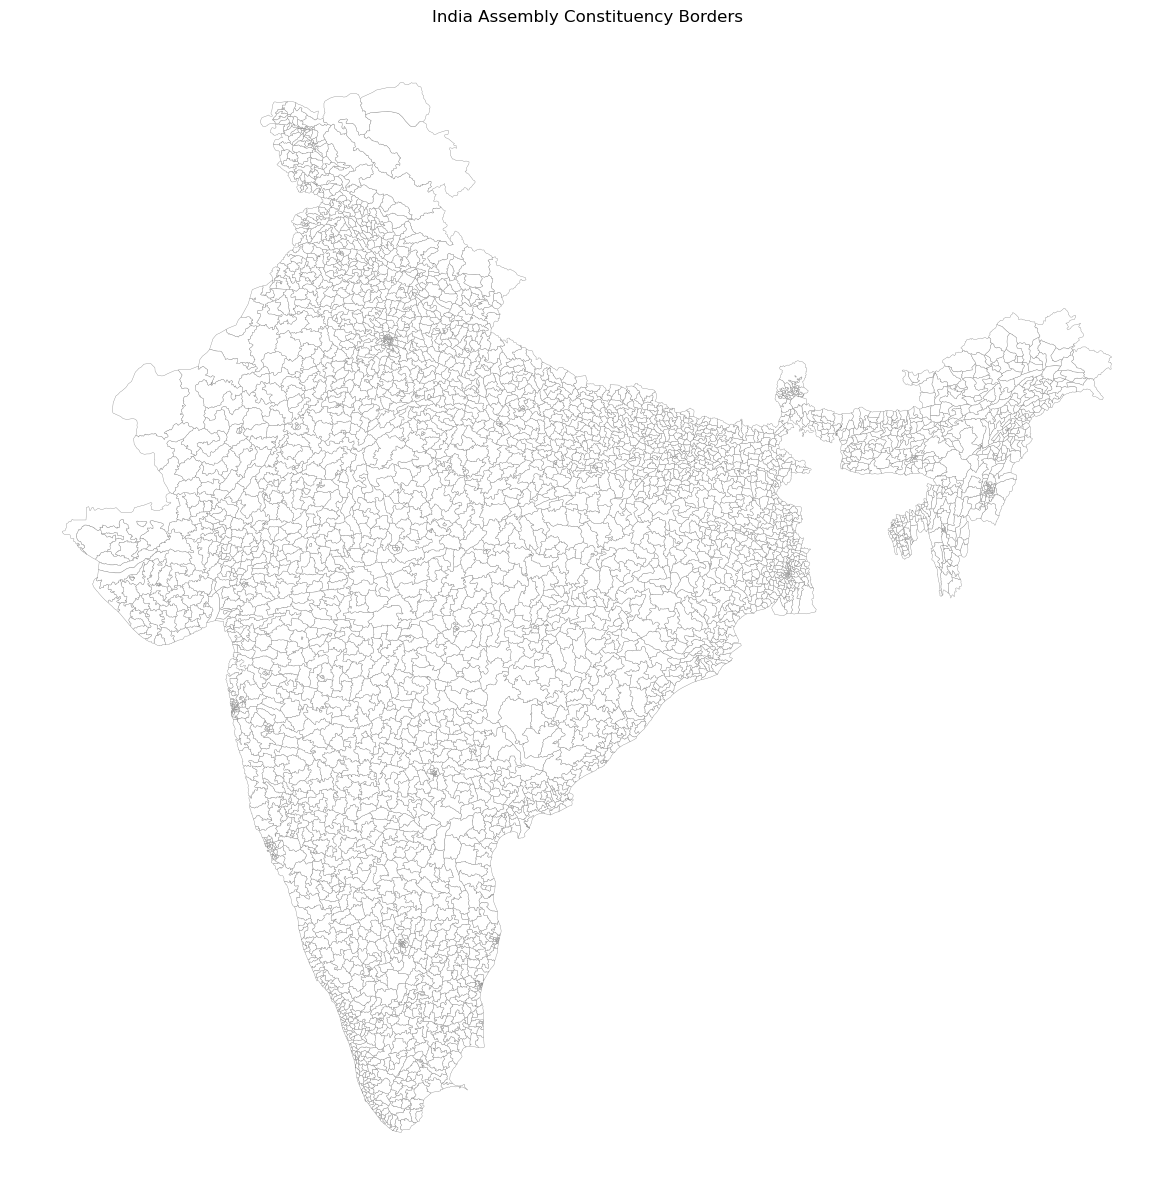

Assembly Constituency UID Excel Saved
Finito


In [9]:
import geopandas as gpd

# Load the GeoJSON file into a GeoDataFrame
ac_file_path= os.path.join(proj_folder, "shape-files/1.raw/india_2012-17_assembly-V3.json")
ac_gdf = gpd.read_file(ac_file_path)
states_gdf = gpd.read_file(st_file_path)

# # Define the list of conditions and their corresponding new values
conditions = [
{'match':'GUJARAT', 'new_value':'GJ-S07'},
{'match':'MADHYA PRADESH', 'new_value':'MP-S13'},
{'match':'UTTAR PRADESH', 'new_value':'UP-S26'},
{'match':'RAJASTHAN', 'new_value':'RJ-S21'},
{'match':'KERALA', 'new_value':'KL-S12'},
{'match':'UTTARAKHAND', 'new_value':'UK-S27'},
{'match':'ODISHA', 'new_value':'OD-S19'},
{'match':'KARNATAKA', 'new_value':'KA-S11'},
{'match':'CHHATTISGARH', 'new_value':'CG-S05'},
{'match':'HIMACHAL PRADESH', 'new_value':'HP-S09'},
{'match':'MANIPUR', 'new_value':'MN-S15'},
{'match':'JHARKHAND', 'new_value':'JH-S10'},
{'match':'DELHI', 'new_value':'DL-U04'},
{'match':'CHANDIGARH', 'new_value':'CH-U02'},
{'match':'DADRA,NAGAR HAVELI,DAMAN & DIU', 'new_value':'DN-U03A'},
{'match':'DADRA,NAGAR HAVELI,DAMAN & DIU', 'new_value':'DD-U03B'},
{'match':'TRIPURA', 'new_value':'TR-S25'},
{'match':'ASSAM', 'new_value':'AS-S03'},
{'match':'SIKKIM', 'new_value':'SK-S22'},
{'match':'MEGHALAYA', 'new_value':'ML-S16'},
{'match':'PUDUCHERRY', 'new_value':'PY-U08'},
{'match':'LAKSHADWEEP', 'new_value':'LD-U07'},
{'match':'ANDAMAN & NICOBAR', 'new_value':'AN-U01'},
{'match':'GOA', 'new_value':'GA-S06'},
{'match':'MIZORAM', 'new_value':'MZ-S17'},
{'match':'JAMMU & KASHMIR', 'new_value':'JK-U05'},
{'match':'LADAKH', 'new_value':'LK-U06'},
{'match':'TELANGANA', 'new_value':'TS-S24'},
{'match':'MAHARASHTRA', 'new_value':'MH-S14'},
{'match':'WEST BENGAL', 'new_value':'WB-S28'},
{'match':'HARYANA', 'new_value':'HR-S08'},
{'match':'PUNJAB', 'new_value':'PB-S20'},
{'match':'ARUNACHAL PRADESH', 'new_value':'AR-S02'},
{'match':'BIHAR', 'new_value':'BR-S04'},
{'match':'NAGALAND', 'new_value':'NL-S18'},
{'match':'TAMIL NADU', 'new_value':'TN-S23'},
{'match':'ANDHRA PRADESH', 'new_value':'AP-S01'},
]


# Add a new property 'new_property' with a default value
ac_gdf['ST_UNIQUE_ID'] = 'NA'

# Modify the new property based on the list of conditions
for idx, row in ac_gdf.iterrows():
    for condition in conditions:
        if row['ST_NAME'] == condition['match']:  # Replace 'existing_property' with the actual column name
            ac_gdf.at[idx, 'ST_UNIQUE_ID'] = condition['new_value']
            break  # Exit the loop after the first match to avoid overwriting

# Sort the DataFrame by 'st_id', 'dtname', and 'sub-dist'
ac_gdf = ac_gdf.sort_values(by=['ST_UNIQUE_ID', 'PC_NAME', 'AC_NAME']).reset_index(drop=True)

# Group by 'st_id' and 'dtname' and create a district number for each unique district within each state
ac_gdf['pc_no'] = ac_gdf.groupby(['ST_UNIQUE_ID', 'PC_NAME']).ngroup() + 1

# Convert the district number to a string and pad with zeros to have three digits
ac_gdf['pc_no'] = ac_gdf['pc_no'].astype(str).str.zfill(3)

# Create the unique district code by concatenating 'st_id' and the zero-padded district number
ac_gdf['PC_UNIQUE_ID'] = ac_gdf['ST_UNIQUE_ID'] + '-P' + ac_gdf['pc_no']

# Group by 'unique_district_code' and create a sub-district number for each unique sub-district within each district
ac_gdf['ac_no'] = ac_gdf.groupby(['ST_UNIQUE_ID', 'PC_NAME', 'AC_NAME']).ngroup() + 1

# Convert the sub-district number to a string and pad with zeros to have four digits
ac_gdf['ac_no'] = ac_gdf['ac_no'].astype(str).str.zfill(4)

# Create the unique sub-district code by concatenating 'unique_district_code' and the zero-padded sub-district number
ac_gdf['AC_UNIQUE_ID'] = ac_gdf['PC_UNIQUE_ID'] + '-A' + ac_gdf['ac_no']

# Drop the intermediate columns 'district_no' and 'sub_district_no' as they are no longer needed
ac_gdf = ac_gdf.drop(columns=['pc_no', 'ac_no'])

# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(shapefiles_cleaned, 'india_ac_cleaned-V2.geojson')
ac_gdf.to_file(output_file_path, driver='GeoJSON')

print('new GeoJSON saved')
##############
# Read the just saved new GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(output_file_path)

# Create a plot
fig, ax = plt.subplots(figsize=(15, 15))
# Set the background color of the figure
fig.patch.set_facecolor('white')  # Change 'lightblue' to your preferred color

# Plot the districts with a thin border
# districts_gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)
gdf.plot(ax=ax, color='white', edgecolor='grey', linewidth=0.25)

# Plot the state borders with a thicker line
# states_gdf.boundary.plot(ax=ax, edgecolor='green', linewidth=1)

# Remove the axis for a cleaner look
ax.axis('off')
# Set the title
plt.title('India Assembly Constituency Borders')
# Display the plot
plt.show()

# Export excel with geo unique ids for cross-check and verification

df = ac_gdf[['ST_UNIQUE_ID', 'ST_NAME', 'PC_UNIQUE_ID', 'PC_NAME', 'AC_UNIQUE_ID', 'AC_NAME']].drop_duplicates()
df = df.sort_values(by=['AC_UNIQUE_ID']).reset_index(drop=True)

# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(shapefiles_interim, 'ac_geo_uid.xlsx')
df.to_excel(output_file_path, sheet_name="ac-geo-uid")

print('Assembly Constituency UID Excel Saved')

print('Finito')


## Prepare Excel with Same Unique IDs for PC
2019
2014
2009

In [21]:
import pandas as pd

# Load the GeoJSON file into a GeoDataFrame
xl_file_path= os.path.join(proj_folder, "election_data/GE for 2019_2014 & 2009.xlsx")
df_2019 = pd.read_excel(xl_file_path, sheet_name="2019")


# Sort the DataFrame by 'st_id' and 'dtname'
df_2019 = df_2019.sort_values(by=['ST_UNIQUE_ID', 'Constituency_Name_as_per_ECI']).reset_index(drop=True)

# Group by 'st_id' and create a serial number for each district within each group
df_2019['serial_no'] = df_2019.groupby('ST_UNIQUE_ID').cumcount() + 1

# Convert the serial number to a string and pad with zeros to have four digits
df_2019['serial_no'] = df_2019['serial_no'].astype(str).str.zfill(3)

# Create the unique ID string by concatenating 'st_id' and the zero-padded serial number
df_2019['PC_UNIQUE_ID'] = df_2019['ST_UNIQUE_ID'] + '-P' + df_2019['serial_no']

# Drop the 'serial_no' column as it is no longer needed
df_2019 = df_2019.drop(columns=['serial_no'])


# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(proj_folder, "election_data/pc_tcpd_data.xlsx")
df_2019.to_excel(output_file_path, sheet_name="LS_2019")

print('new Excel saved')
# print(df_2014['PC_UNIQUE_ID'].drop_duplicates()
##############

# Export excel with geo unique ids for cross-check and verification

df = df_2019[['PC_UNIQUE_ID', 'Constituency_Name_as_per_ECI']].drop_duplicates()

# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(proj_folder, "election_data/pc_tcpd_uid.xlsx")
df.to_excel(output_file_path, sheet_name="2019")

print('TCPD - PC UID Excel 2019 Saved')

print('Finito')


new Excel saved
TCPD - PC UID Excel 2019 Saved
Finito


In [28]:
import pandas as pd

# Load the GeoJSON file into a GeoDataFrame
xl_file_path= os.path.join(proj_folder, "election_data/GE for 2019_2014 & 2009.xlsx")
df_2014 = pd.read_excel(xl_file_path, sheet_name="2014")


# Add a new property 'new_property' with a default value
df_2014['ST_UNIQUE_ID'] = df_2014['ST_ABB_AUTHORS'] + '-' + df_2014['ST_CODE_AUTHORS']

# Sort the DataFrame by 'st_id' and 'dtname'
df_2014 = df_2014.sort_values(by=['ST_UNIQUE_ID', 'Constituency_Name_as_per_ECI']).reset_index(drop=True)

# Group by 'st_id' and create a serial number for each district within each group
df_2014['serial_no'] = df_2014.groupby('ST_UNIQUE_ID').cumcount() + 1

# Convert the serial number to a string and pad with zeros to have four digits
df_2014['serial_no'] = df_2014['serial_no'].astype(str).str.zfill(3)

# Create the unique ID string by concatenating 'st_id' and the zero-padded serial number
df_2014['PC_UNIQUE_ID'] = df_2014['ST_UNIQUE_ID'] + '-P' + df_2014['serial_no']

# Drop the 'serial_no' column as it is no longer needed
df_2014 = df_2014.drop(columns=['serial_no'])


# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(proj_folder, "election_data/pc_tcpd_data.xlsx")
df_2014.to_excel(output_file_path, sheet_name="LS_2014")

print('new Excel saved')
# print(df_2014['PC_UNIQUE_ID'].drop_duplicates()
##############

# Export excel with geo unique ids for cross-check and verification

df = df_2014[['PC_UNIQUE_ID', 'Constituency_Name_as_per_ECI']].drop_duplicates()

# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(proj_folder, "election_data/pc_tcpd_uid.xlsx")
df.to_excel(output_file_path, sheet_name="2014")

print('TCPD - PC UID Excel 2014 Saved')

print('Finito')


new Excel saved
TCPD - PC UID Excel 2014 Saved
Finito


In [27]:
import pandas as pd

# Load the GeoJSON file into a GeoDataFrame
xl_file_path= os.path.join(proj_folder, "election_data/GE for 2019_2014 & 2009.xlsx")
df_2009 = pd.read_excel(xl_file_path, sheet_name="2009")

# Add a new property 'new_property' with a default value
df_2009['ST_UNIQUE_ID'] = df_2009['ST_ABB_AUTHORS'] + '-' + df_2009['ST_CODE_AUTHORS']

# Sort the DataFrame by 'st_id' and 'dtname'
df_2009 = df_2009.sort_values(by=['ST_UNIQUE_ID', 'Constituency_Name_as_per_ECI']).reset_index(drop=True)

# Group by 'st_id' and create a serial number for each district within each group
df_2009['serial_no'] = df_2009.groupby('ST_UNIQUE_ID').cumcount() + 1

# Convert the serial number to a string and pad with zeros to have four digits
df_2009['serial_no'] = df_2009['serial_no'].astype(str).str.zfill(3)

# Create the unique ID string by concatenating 'st_id' and the zero-padded serial number
df_2009['PC_UNIQUE_ID'] = df_2009['ST_UNIQUE_ID'] + '-P' + df_2009['serial_no']

# Drop the 'serial_no' column as it is no longer needed
df_2009 = df_2009.drop(columns=['serial_no'])


# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(proj_folder, "election_data/pc_tcpd_data.xlsx")
df_2009.to_excel(output_file_path, sheet_name="LS_2009")

print('new Excel saved')
# print(df_2009['PC_UNIQUE_ID'].drop_duplicates()
##############

# Export excel with geo unique ids for cross-check and verification

df = df_2009[['PC_UNIQUE_ID', 'Constituency_Name_as_per_ECI']].drop_duplicates()

# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(proj_folder, "election_data/pc_tcpd_uid.xlsx")
df.to_excel(output_file_path, sheet_name="2009")

print('TCPD - PC UID Excel 2009 Saved')

print('Finito')

new Excel saved
TCPD - PC UID Excel 2009 Saved
Finito


In [29]:
import pandas as pd

# # Load the GeoJSON file into a GeoDataFrame
# xl_file_path= os.path.join(proj_folder, "election_data/GE for 2019_2014 & 2009.xlsx")
# df_2019 = pd.read_excel(xl_file_path, sheet_name="2019")
# df_2014 = pd.read_excel(xl_file_path, sheet_name="2014")
# df_2009 = pd.read_excel(xl_file_path, sheet_name="2009")

# stack data
df_pc_tcpd = pd.concat([df_2019,df_2014,df_2009],ignore_index=True)


# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(proj_folder, "election_data/pc_tcpd_full_data.xlsx")
df_pc_tcpd.to_excel(output_file_path, sheet_name="Consolidated")

print('new Excel saved')
# print(df_2009['PC_UNIQUE_ID'].drop_duplicates()
##############

# Export excel with geo unique ids for cross-check and verification

df = df_pc_tcpd[['PC_UNIQUE_ID', 'Constituency_Name_as_per_ECI']].drop_duplicates()

# Save the modified GeoDataFrame back to a GeoJSON file
output_file_path= os.path.join(proj_folder, "election_data/pc_tcpd_uid_full.xlsx")
df.to_excel(output_file_path, sheet_name="full")

print('TCPD - PC UID Full Excel Saved')

print('Finito')


new Excel saved
TCPD - PC UID Full Excel Saved
Finito
